In [1]:
import pandas as pd

d = pd.read_csv("./data/data.csv")


In [2]:
import numpy as np

def summary(d):
    for col in d.columns:
        vals = d[col].values
        if type(d[col][0]) == str:
            type_list = set(list(vals))
            print('{} : '.format(col), end='')
            for t in type_list:
                print('{} : {}'.format(t, np.count_nonzero(vals==t)), end=', ')
        else:
            v_sort = np.sort(vals)
            print('{} : Min = {:5.2f}, Max = {:5.2f}, 1st Qu = {:5.2f}, '
                  'Median = {:5.2f}, 3rd Qu = {:5.2f}, Mean = {:5.2f}'.format(
                      col, min(vals), max(vals), v_sort[int(vals.size / 4)], v_sort[int(vals.size / 2)], v_sort[int(vals.size * 0.75)], vals.mean()))

        
summary(d)

y : Min =  2.00, Max = 15.00, 1st Qu =  6.00, Median =  8.00, 3rd Qu = 10.00, Mean =  7.83
x : Min =  7.19, Max = 12.40, 1st Qu =  9.43, Median = 10.16, 3rd Qu = 10.73, Mean = 10.09
f : T : 50, C : 50, 

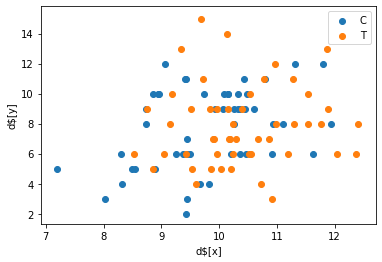

In [4]:
import matplotlib.pyplot as plt

plt.scatter(d['x'][d['f']=='C'], d['y'][d['f']=='C'], label='C')
plt.scatter(d['x'][d['f']=='T'], d['y'][d['f']=='T'], label='T')
plt.xlabel('d$[x]')
plt.ylabel('d$[y]')
plt.legend()
plt.show()

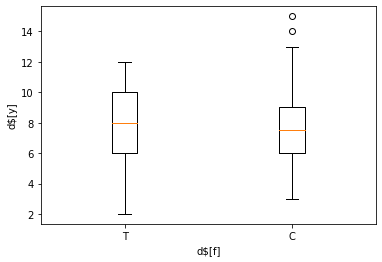

In [5]:
fig, ax = plt.subplots()
# boxplot の引数 whis でどこまでひげを引っ張るか設定する
ax.boxplot((d['y'][d['f'] == "C"], d['y'][d['f'] == "T"]))
ax.set_xticklabels(['T', 'C'])
ax.set_xlabel('d$[f]')
ax.set_ylabel('d$[y]')
plt.show()

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [11]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.90e-08
Time:                        14:25:49   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     